In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Airbnb Activity in Paris: An Analytical Investigation
</div>

![Airbnb view paris](https://www.parisperfect.com/cdn-cgi/image/format=auto,width=1256/https://www.parisperfect.com/g/photos/upload/best-airbnb-paris.jpg)

This study investigates the development of the Airbnb market in Paris, with attention to temporal evolution, spatial patterns, pricing structures, host participation, and the effects of regulatory interventions. The analysis seeks to clarify how listing supply, host behavior, and municipal policies have shaped the short-term rental landscape in the city.

## Abstract

- **Substantial Expansion Prior to 2017** : Airbnb listings and host participation increased rapidly until the introduction of stricter regulatory frameworks by the Paris municipality.
- **Regulatory Constraints Post-2017** : Policy measures aimed at controlling short-term rentals correspond with a pronounced slowdown in platform growth.
- **Declines Following 2020** : Prices and new host registrations decreased in the aftermath of global travel restrictions and broader economic disruptions.

- **Future Implications** : Adaptive pricing, regulatory compliance, and enhanced service quality are likely to remain central for host viability.

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    1. Data Acquisition and Initial Assessment
</div>

The dataset is first imported and examined to understand its structure, variable definitions, and basic descriptive characteristics. This preliminary review establishes the foundation for subsequent analytical steps.

## 1.1 Importing the Dataset and Reviewing Variables

In [26]:
Reviews_df = pd.read_csv(r"C:\Users\USER\Downloads\Airbnb Data\Reviews.csv")
Reviews_data_dictionary_df = pd.read_csv(r"C:\Users\USER\Downloads\Airbnb Data\Reviews_data_dictionary.csv")
Listings_df = pd.read_csv(
    r"C:\Users\USER\Downloads\Airbnb Data\Listings.csv",
    encoding='ISO-8859-1',
    low_memory=False
)
Listings_data_dictionary_df = pd.read_csv(r"C:\Users\USER\Downloads\Airbnb Data\Listings_data_dictionary.csv")

In [31]:
Reviews_data_dictionary_df = pd.read_csv(r"C:\Users\USER\Downloads\Airbnb Data\Reviews_data_dictionary.csv")
Reviews_data_dictionary_df

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [30]:
Reviews_df = pd.read_csv(r"C:\Users\USER\Downloads\Airbnb Data\Reviews.csv")
Reviews_df

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


In [33]:
Listings_data_dictionary_df = pd.read_csv(r"C:\Users\USER\Downloads\Airbnb Data\Listings_data_dictionary.csv")
Listings_data_dictionary_df

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [32]:
Listings_df = pd.read_csv(
    r"C:\Users\USER\Downloads\Airbnb Data\Listings.csv",
    encoding='ISO-8859-1',
    low_memory=False
)
Listings_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    2. Data Cleaning and Refinement
</div>

## 2.1 Filtering Paris-Specific Listings

Only observations corresponding to listings located within the city of Paris are retained. A subset of variables relevant to the analysis is preserved to ensure focus and clarity.

In [36]:
paris_listings = Listings_df[Listings_df["city"]=="Paris"]
paris_listings = paris_listings.loc[:,["listing_id","host_since","neighbourhood","city","accommodates","price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     64690 non-null  int64 
 1   host_since     64657 non-null  object
 2   neighbourhood  64690 non-null  object
 3   city           64690 non-null  object
 4   accommodates   64690 non-null  int64 
 5   price          64690 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [37]:
paris_listings.isna().sum()

listing_id        0
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [38]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,2014-07-31,Elysee,Paris,2,89
3,4797344,2013-12-17,Vaugirard,Paris,2,58
4,4823489,2014-12-14,Passy,Paris,2,60


## 2.2 Handling Missing Values

Entries containing missing values in essential fields are removed to avoid violating analytical assumptions or introducing bias into the results.

In [39]:
paris_listings.dropna(how = "any",inplace = True)

In [40]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     64657 non-null  int64 
 1   host_since     64657 non-null  object
 2   neighbourhood  64657 non-null  object
 3   city           64657 non-null  object
 4   accommodates   64657 non-null  int64 
 5   price          64657 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [41]:
paris_listings["host_since"] = pd.to_datetime(paris_listings["host_since"])

In [42]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     64657 non-null  int64         
 1   host_since     64657 non-null  datetime64[ns]
 2   neighbourhood  64657 non-null  object        
 3   city           64657 non-null  object        
 4   accommodates   64657 non-null  int64         
 5   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ MB


In [43]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.465700e+04,64657,64657.000000,64657.000000
mean,2.424035e+07,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2.577000e+03,2008-08-30 00:00:00,0.000000,0.000000
25%,1.181517e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.395412e+07,2015-07-07 00:00:00,2.000000,80.000000
75%,3.721013e+07,2017-05-29 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.432650e+07,NaN,1.588382,214.479626


## 2.3 Removal of Zero-Value Anomalies

Zero values in variables that should not logically contain zeros—such as nightly price—are interpreted as incorrect entries and excluded.

In [44]:
paris_listings = paris_listings[(paris_listings["accommodates"]!=0) | (paris_listings["price"]!=0)]

In [45]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64603 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     64603 non-null  int64         
 1   host_since     64603 non-null  datetime64[ns]
 2   neighbourhood  64603 non-null  object        
 3   city           64603 non-null  object        
 4   accommodates   64603 non-null  int64         
 5   price          64603 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ MB


In [46]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.460300e+04,64603,64603.000000,64603.000000
mean,2.422340e+07,2015-10-31 02:35:06.960977408,3.040416,113.199155
min,2.577000e+03,2008-08-30 00:00:00,1.000000,0.000000
25%,1.180688e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.393266e+07,2015-07-06 00:00:00,2.000000,80.000000
75%,3.719466e+07,2017-05-25 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.432042e+07,NaN,1.586614,214.544307


In [47]:
paris_listings = paris_listings[(paris_listings["price"]!=0)]

In [48]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.459500e+04,64595,64595.000000,64595.000000
mean,2.422116e+07,2015-10-30 22:46:09.985293056,3.040483,113.213174
min,2.577000e+03,2008-08-30 00:00:00,1.000000,8.000000
25%,1.180597e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.392314e+07,2015-07-06 00:00:00,2.000000,80.000000
75%,3.719008e+07,2017-05-25 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.431989e+07,NaN,1.586691,214.553894


## 2.4 Detection and Treatment of Outliers

Outliers, particularly extremely high nightly prices that deviate significantly from expected ranges, are identified via statistical thresholds (e.g., standard deviation-based detection) and removed to enhance interpretive reliability.

<Axes: ylabel='price'>

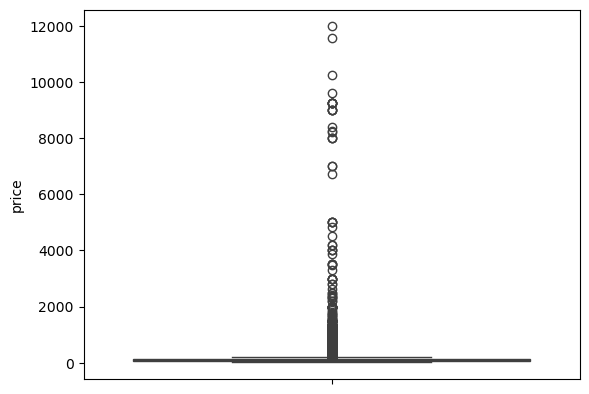

In [50]:
sns.boxplot(paris_listings["price"])

<Axes: ylabel='accommodates'>

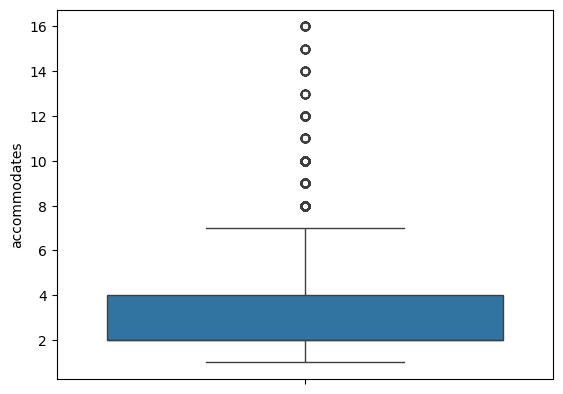

In [51]:
sns.boxplot(paris_listings["accommodates"])

<Axes: xlabel='price', ylabel='Count'>

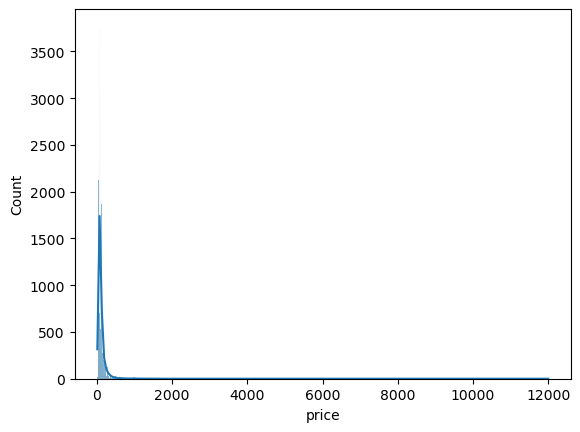

In [52]:
sns.histplot(paris_listings["price"],kde = True)

In [53]:
upper_limit = np.mean(paris_listings["price"]) + 3*np.std(paris_listings["price"])
upper_limit

np.float64(756.8698733534391)

## 2.5 Exclusion of Extreme Price Outliers Using a Three–Standard Deviation Criterion

Extreme price values can disproportionately affect statistical analysis and mask underlying patterns. Therefore, listings with nightly prices exceeding three standard deviations from the mean were identified as extreme outliers and removed to improve data reliability and analytical validity.

In [55]:
paris_listings = paris_listings[(paris_listings["price"]<=upper_limit)]

In [56]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.419200e+04,64192,64192.000000,64192.000000
mean,2.417964e+07,2015-10-28 06:37:15.643070720,3.018367,103.218376
min,2.577000e+03,2008-08-30 00:00:00,1.000000,8.000000
25%,1.176660e+07,2014-03-07 00:00:00,2.000000,59.000000
50%,2.383710e+07,2015-07-05 00:00:00,2.000000,80.000000
75%,3.714562e+07,2017-05-20 00:00:00,4.000000,119.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,756.000000
std,1.431458e+07,NaN,1.528200,81.350333


### Summary of Data Cleaning Procedures

- **Initial number of observations** : 64,690  
- **Number of observations after data cleaning** : 64,192  
- **Observations removed during cleaning** : 498  

Overall, **498 records** were excluded during the data cleaning process, representing approximately **0.77% of the total dataset**. 
This indicates that the cleaning procedures retained the vast majority of the original data while effectively removing inconsistent or invalid entries, thereby preserving data integrity for subsequent analysis.

In [58]:
paris_listings.describe(include = "object")

,neighbourhood,city
count,64192,64192
unique,20,1
top,Buttes-Montmartre,Paris
freq,7203,64192


In [59]:
paris_listings["neighbourhood"].value_counts()

neighbourhood
Buttes-Montmartre      7203
Popincourt             6188
Vaugirard              4799
Enclos-St-Laurent      4598
Batignolles-Monceau    4309
Menilmontant           3747
Buttes-Chaumont        3712
Passy                  3158
Opera                  3141
Temple                 2920
Reuilly                2644
Observatoire           2471
Gobelins               2271
Bourse                 2147
Pantheon               2127
Luxembourg             1975
Hotel-de-Ville         1958
Palais-Bourbon         1741
Elysee                 1694
Louvre                 1389
Name: count, dtype: int64

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    3. Spatial Analysis of Listings Within Paris
</div>

## 3.1 Variation in Average Nightly Prices Across Districts

In [60]:
paris_listings_avg_price = paris_listings.groupby("neighbourhood").agg({"price":"mean"})
paris_listings_avg_price.sort_values("price",ascending = False,inplace = True)

In [61]:
paris_listings_avg_price

,price
neighbourhood,
Elysee,170.344746
Louvre,149.980562
Luxembourg,144.372658
Palais-Bourbon,142.155658
Hotel-de-Ville,137.365169
Passy,132.595313
Bourse,132.476479
Temple,126.439384
Pantheon,117.982605


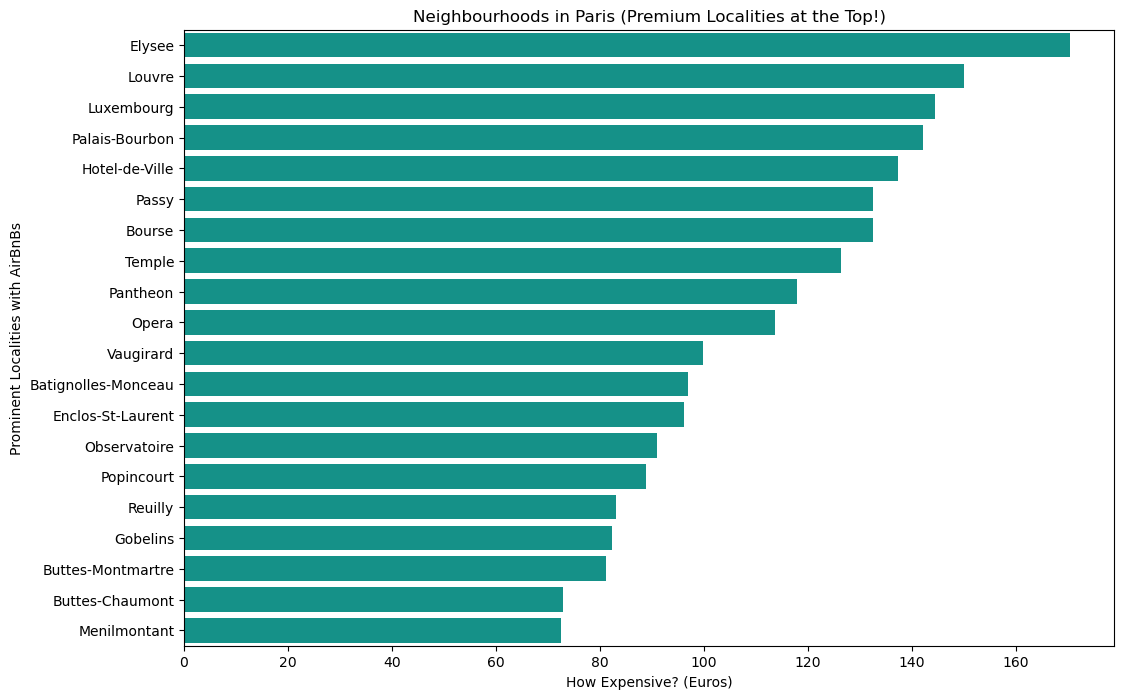

In [62]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_listings_avg_price,
           x = "price",
           y = paris_listings_avg_price.index, color = "#00A699")
plt.title("Neighbourhoods in Paris (Premium Localities at the Top!)")
plt.xlabel("How Expensive? (Euros)")
plt.ylabel("Prominent Localities with AirBnBs")
plt.show()

### Insight on Average Nightly Prices by Locality in Paris

- The **highest-priced listings** are concentrated in central and prestigious districts such as **Élysée (€170 per night)**, **Louvre (€150 per night)** and **Luxembourg (€144 per night)**. These areas benefit from close proximity to major landmarks, luxury shopping districts, and key governmental or cultural institutions, which contributes to elevated demand and higher prices.  

- **Moderately priced listings** are observed in districts such as **Temple (€126 per night)**, **Panthéon (€118 per night)** and **Opéra (€114 per night)**. These localities remain popular among visitors but are comparatively less exclusive than the highest-priced areas.  

- **Lower-priced accommodations** are predominantly located in neighborhoods including **Ménilmontant (€72 per night)**, **Buttes-Chaumont (€73 per night)** and **Buttes-Montmartre (€81 per night)**. These districts are situated farther from the central tourist zones and are more attractive to budget-conscious travelers or those seeking a local residential experience.  

**Overall Interpretation**: The observed price gradient reflects both proximity to cultural and tourist attractions and the relative affluence of each locality. Central and historically significant districts command premium prices, whereas outer neighborhoods offer more affordable alternatives.


<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    4. Accommodation Capacity and Pricing Patterns
</div>

## 4.1 Relationship Between Guest Capacity and Nightly Price

In [63]:
paris_listings_accomodates = paris_listings.groupby("accommodates").agg({"price":"mean"})
paris_listings_accomodates.sort_values("price",ascending = False,inplace = True)

In [64]:
paris_listings_accomodates

,price
accommodates,
13,475.000000
14,438.125000
11,419.880000
12,394.542373
15,337.250000
9,335.807229
10,329.181818
8,271.515510
7,231.254902


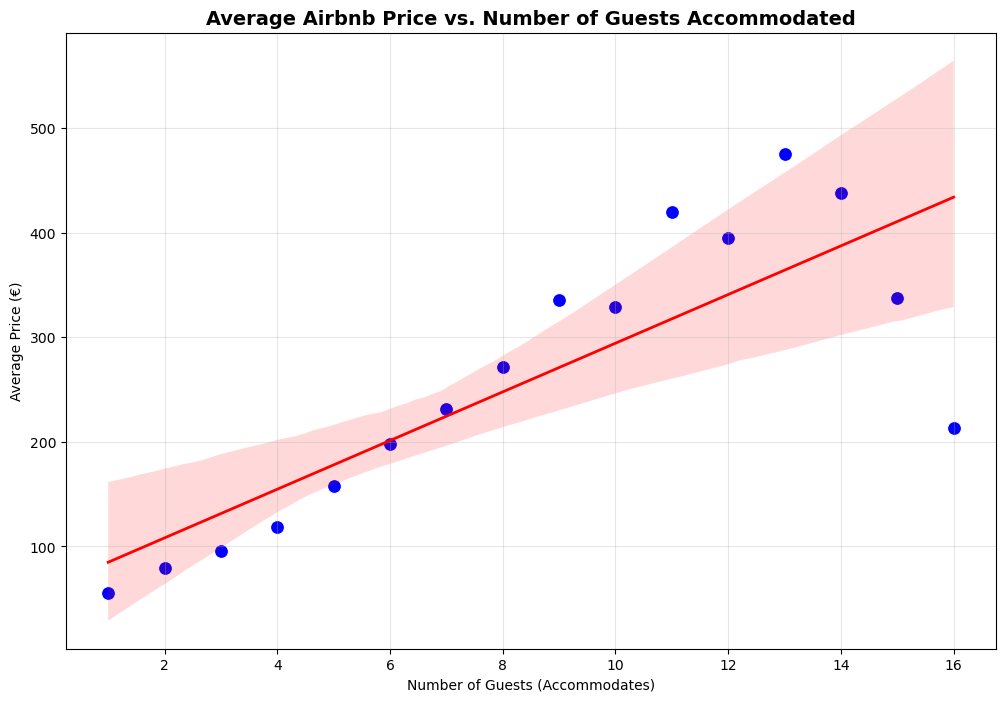

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="accommodates", y="price", data=paris_listings_accomodates, s=100, color="blue")

# Add a trendline
sns.regplot(x=paris_listings_accomodates.index, y="price", data=paris_listings_accomodates,
            scatter=False, color="red", line_kws={"linewidth":2})

plt.title("Average Airbnb Price vs. Number of Guests Accommodated", fontsize=14, fontweight="bold")
plt.xlabel("Number of Guests (Accommodates)")
plt.ylabel("Average Price (€)")
plt.grid(alpha=0.3)
plt.show()

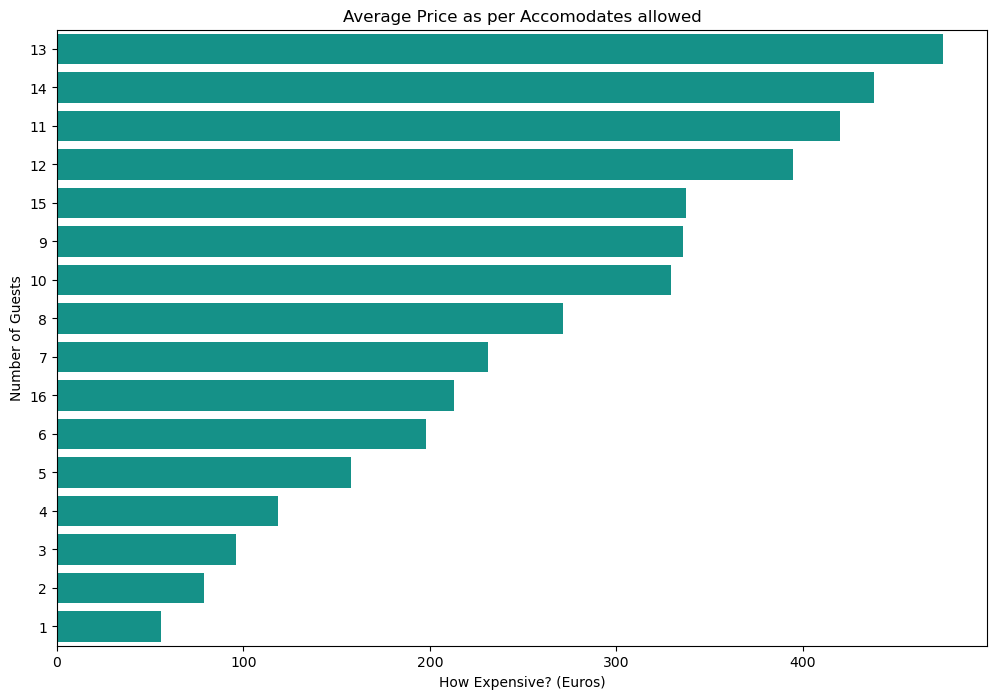

In [66]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_listings_accomodates,
           x = "price",
           y = paris_listings_accomodates.index, color = "#00A699",
           orient = "h",order = paris_listings_accomodates.index)
plt.title("Average Price as per Accomodates allowed")
plt.xlabel("How Expensive? (Euros)")
plt.ylabel("Number of Guests")
plt.show()

### Insight on Accommodation Capacity and Average Prices

- As anticipated, listings with **greater guest capacity** are associated with **higher average nightly prices**. 
  - Smaller accommodations designed for **1–2 guests** are the least expensive, with average prices ranging from **€56 to €79 per night**.  
  - Medium-capacity listings accommodating **4–6 guests** typically exhibit average nightly prices between **€118 and €198**. 
  - Large properties designed for **10 or more guests** are substantially more expensive, with nightly rates **frequently exceeding €300**.

- The highest average prices are observed among large group-oriented accommodations: 
  - **13 guests: €475/night**  
  - **14 guests: €438/night**  
  - **11 guests: €420/night**  

- Notably, beyond a certain accommodation size (e.g., **15–16 guests**), average nightly prices do not increase proportionally, indicating a niche but relatively limited demand for **very large properties**.

**Overall Interpretation**: Nightly prices increase with accommodation size; however, the relationship is not strictly linear. Smaller units primarily serve budget-oriented travelers, whereas larger listings target premium or group stays and command significantly higher rates.

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    5. Temporal Dynamics of Host Participation and Pricing
</div>

## 5.1 Importance of the host_since Variable

The host_since field indicates the date when each host joined the platform. Analyzing this variable allows for identification of host entry trends, market adoption periods, and broader temporal shifts in platform activity.

In [67]:
paris_listings["year_of_listing"] = paris_listings["host_since"].dt.year

### Why Use the *host_since* Column?

The **`host_since`** column records the date when a host first listed their property on Airbnb.  
Analyzing this column can provide valuable business insights because:

- **Market Entry Timing**: It shows when new hosts are joining the platform, which reflects Airbnb’s growth phases.  
- **Host Experience**: Longer tenure may correlate with more reliable hosts and better reviews, whereas recent hosts might need onboarding support.  
- **Business Cycles**: Peaks in new host sign-ups can indicate favorable periods for the short-term rental business (e.g., tourism booms, policy changes, or high-demand seasons).  
- **Impact of Regulations**: Sudden drops in new host listings may highlight external factors such as regulations or economic conditions affecting supply.  

In short, **tracking the `host_since` column helps identify the best times when the Airbnb business environment was most attractive for new entrants**, which can act as a proxy for "good times" in the market.


In [68]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price,year_of_listing
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53,2011
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120,2013
2,4082273,2014-07-31,Elysee,Paris,2,89,2014
3,4797344,2013-12-17,Vaugirard,Paris,2,58,2013
4,4823489,2014-12-14,Passy,Paris,2,60,2014


## 5.2 Trends in Host Entry Over Time

In [69]:
paris_listings_final_analysis = paris_listings.groupby("year_of_listing").agg({
    "listing_id":"count","price":"mean"
})
paris_listings_final_analysis

,listing_id,price
year_of_listing,,
2008,4,77.750000
2009,105,142.114286
2010,415,120.995181
2011,1333,109.597149
2012,4576,107.654283
2013,8128,104.295153
2014,10889,96.403067
2015,12100,96.397438
2016,8767,100.576366


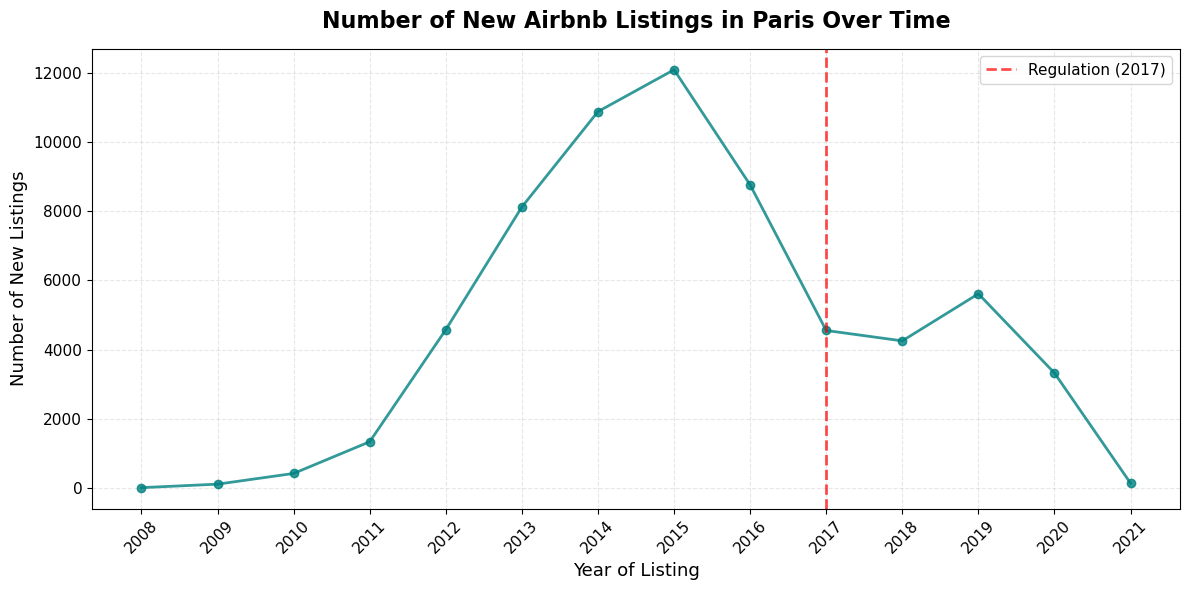

In [70]:
plt.figure(figsize=(12,6))

plt.plot(paris_listings_final_analysis.index, paris_listings_final_analysis['listing_id'], 
         marker='o', linestyle='-', linewidth=2, color='teal', alpha=0.8)

# Titles and labels
plt.title("Number of New Airbnb Listings in Paris Over Time", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year of Listing", fontsize=13)
plt.ylabel("Number of New Listings", fontsize=13)

# Grid and ticks
plt.grid(alpha=0.3, linestyle="--")
plt.xticks(paris_listings_final_analysis.index, rotation=45)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

# Highlight regulation year (2017)
plt.axvline(x=2017, color='red', linestyle='--', linewidth=2, alpha=0.7, label="Regulation (2017)")
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

### Insight on Airbnb Listings Over Time

- Between **2008 and 2015**, the number of new Airbnb listings in Paris increased rapidly, reaching a peak during **2015–2016**, when more than **12,000 new hosts** entered the market. This period reflects **strong market attractiveness and rapid expansion**, characterized by simultaneous growth in both **supply (host participation)** and **demand (traveler interest)**.  

- Beginning in **2017**, a pronounced decline in new listings is observed. This trend coincides with the **regulatory measures introduced in Paris in 2017** to address housing availability concerns. These policies significantly reduced the entry of new hosts, resulting in **a marked slowdown in supply growth**.  

- The sustained decline following 2017 suggests that **entry barriers remained elevated**, continuing to deter potential hosts. Although traveler demand likely remained stable or continued to grow, **restricted supply expansion** may have limited accommodation availability and exerted upward pressure on prices.  

**Overall Interpretation**:
- **Pre-2017** : Robust growth in both host participation (supply) and customer demand.
- **Post-2017** : Regulatory intervention constrained new host entry, slowing supply expansion despite sustained demand.

## 5.3 Temporal Changes in Average Nightly Prices

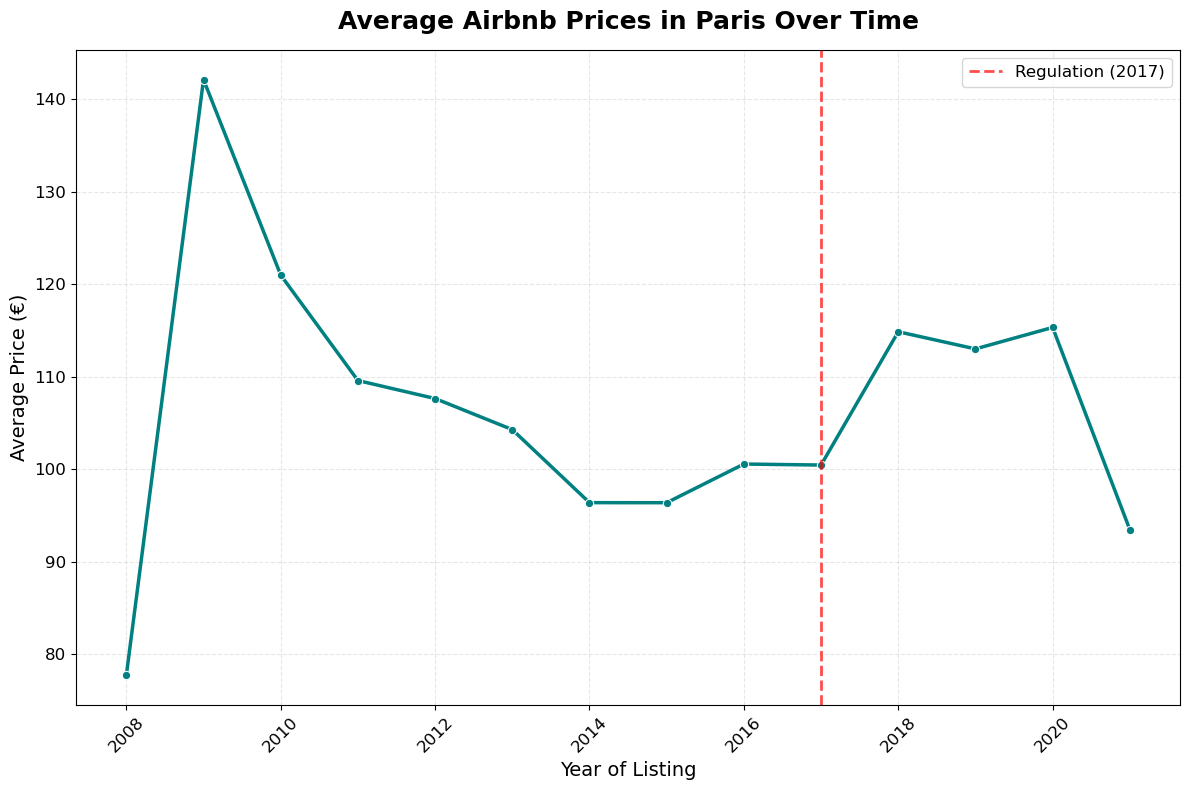

In [71]:
plt.figure(figsize=(12,8))

# Line chart with markers
sns.lineplot(
    x="year_of_listing", 
    y="price", 
    data=paris_listings_final_analysis, 
    marker="o", 
    linewidth=2.5, 
    color="teal"
)

# Titles and labels
plt.title("Average Airbnb Prices in Paris Over Time", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Year of Listing", fontsize=14)
plt.ylabel("Average Price (€)", fontsize=14)

# Grid styling
plt.grid(alpha=0.3, linestyle="--")

# Highlight regulation year (2017)
plt.axvline(x=2017, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Regulation (2017)")

# Improve ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### Insight on Average Airbnb Prices Over Time

- **2008–2009** : Average nightly prices were initially low (approximately **€78**) but increased sharply in 2009 to over **€140**. This pattern likely reflects early market scarcity and premium pricing during Airbnb’s initial entry into the Paris market.  

- **2010–2014** : A **sustained downward trend** is observed, with average prices declining from approximately **€121** to **€96**. This decline suggests increasing competition and expanded supply as a growing number of hosts entered the platform, leading to price normalization. 

- **2015–2017** : Prices stabilized at approximately **€100–€101 per night**, indicating a period of relative equilibrium between supply expansion and traveler demand.  

- **2018–2020** : Average nightly prices increased to around **€115**, despite the regulatory measures introduced in 2017. The slowdown in supply growth, combined with sustained demand, likely contributed to upward pressure on prices.  

- **2021 onwards** : Prices declined again to approximately **€93**, potentially reflecting pandemic-related disruptions to travel demand and reduced market activity.  

**Overall Interpretation** : 
- In the **initial phase**, limited supply contributed to elevated prices.
- As host participation increased, **heightened competition reduced average prices**.
- The **2017 regulatory framework** constrained supply growth, resulting in a subsequent price increase.
- **Pandemic-related effects** likely explain the decline in prices observed after 2020.  


## 5.4 Temporal Relationship Between Airbnb Listings and Average Nightly Prices in Paris (2008–2021)

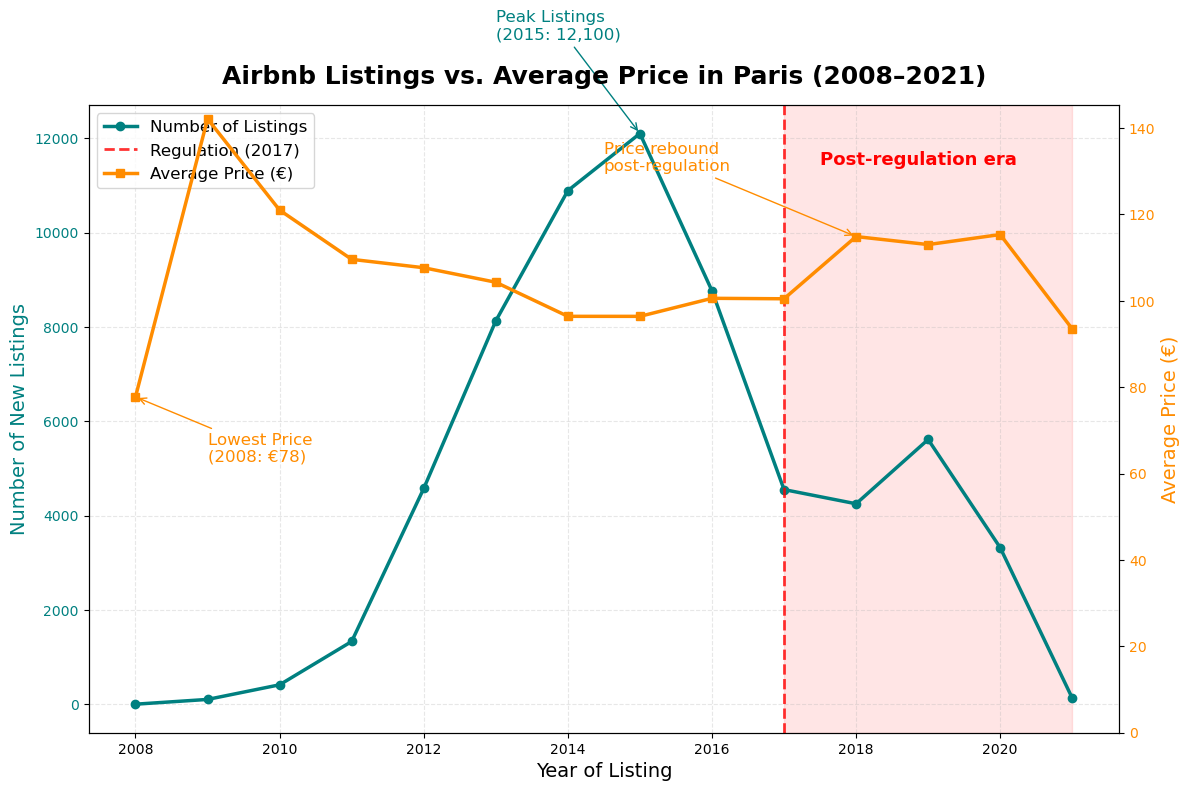

In [72]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot number of listings (left y-axis)
ax.plot(
    paris_listings_final_analysis.index, 
    paris_listings_final_analysis["listing_id"], 
    color="teal", linewidth=2.5, marker="o", label="Number of Listings"
)
ax.set_xlabel("Year of Listing", fontsize=14)
ax.set_ylabel("Number of New Listings", fontsize=14, color="teal")
ax.tick_params(axis="y", labelcolor="teal")

# Secondary y-axis for price
ax2 = ax.twinx()
ax2.plot(
    paris_listings_final_analysis.index, 
    paris_listings_final_analysis["price"], 
    color="darkorange", linewidth=2.5, marker="s", label="Average Price (€)"
)
ax2.set_ylabel("Average Price (€)", fontsize=14, color="darkorange")
ax2.tick_params(axis="y", labelcolor="darkorange")
ax2.set_ylim(0)

# Titles and grid
plt.title("Airbnb Listings vs. Average Price in Paris (2008–2021)", fontsize=18, fontweight="bold", pad=15)
ax.grid(alpha=0.3, linestyle="--")

# Highlight regulation year (2017)
ax.axvline(x=2017, color="red", linestyle="--", linewidth=2, alpha=0.8, label="Regulation (2017)")

# Shade post-2017 period
ax.axvspan(2017, paris_listings_final_analysis.index.max(), color="red", alpha=0.1)

# Add text inside shaded area
ax.text(
    2017.5, 
    ax.get_ylim()[1]*0.9,   # position text near the top of shaded area
    "Post-regulation era", 
    color="red", fontsize=13, fontweight="bold"
)

# ---- Annotations ----
# Peak in listings (2015–2016)
peak_year = paris_listings_final_analysis["listing_id"].idxmax()
peak_val = paris_listings_final_analysis["listing_id"].max()
ax.annotate(
    f"Peak Listings\n({peak_year}: {peak_val:,})",
    xy=(peak_year, peak_val),
    xytext=(peak_year-2, peak_val+2000),
    arrowprops=dict(arrowstyle="->", color="teal"),
    fontsize=12, color="teal"
)

# Lowest price point (2014)
low_year = paris_listings_final_analysis["price"].idxmin()
low_val = paris_listings_final_analysis["price"].min()
ax2.annotate(
    f"Lowest Price\n({low_year}: €{low_val:.0f})",
    xy=(low_year, low_val),
    xytext=(low_year+1, low_val-15),
    arrowprops=dict(arrowstyle="->", color="darkorange"),
    fontsize=12, color="darkorange"
)

# Price rebound post-2017
ax2.annotate(
    "Price rebound\npost-regulation",
    xy=(2018, paris_listings_final_analysis.loc[2018, "price"]),
    xytext=(2014.5, 130),
    arrowprops=dict(arrowstyle="->", color="darkorange"),
    fontsize=12, color="darkorange"
)

# Legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=12, loc="upper left")

plt.tight_layout()
plt.show()

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    6. Concluding Findings and Policy Implications
</div>

## Summary of Principal Findings

### 1. Sustained Growth Prior to 2017
- Airbnb listings in Paris increased rapidly between 2008 and 2016, reaching peak expansion during 2015–2016.
- This growth indicates strong traveler demand and high attractiveness of Paris as a short-term rental destination.

## 2. Effects of the 2017 Regulatory Framework
- The introduction of regulatory restrictions in 2017 led to a sharp decline in the number of new hosts entering the market.
- Despite continued traveler demand, the constrained entry of hosts resulted in a slower expansion of listing supply.

## 3. Evolution of Pricing Patterns
- Average nightly prices declined between 2010 and 2014 due to increased competition from a rapidly growing number of hosts.
- Following 2017, prices increased as supply growth slowed, suggesting a tightening supply–demand balance.
- During the COVID-19 pandemic (2020–2021), average prices declined again as a result of severe demand disruptions.

## 4. Geographic Variation in Pricing
- Central and high-profile districts such as Louvre, Élysée, and Luxembourg consistently command premium prices.
- Peripheral neighborhoods, including Ménilmontant and Buttes-Chaumont, remain more affordable and primarily attract budget-conscious travelers.

## 5. Role of Accommodation Capacity
- Nightly prices increase with the number of guests a listing can accommodate, though the relationship is not strictly proportional.
- Large-capacity properties (accommodating ten or more guests) serve a niche market segment and exhibit substantially higher average prices.

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    7. Strategic Implications for Platform Stakeholders
</div>

## 1. Concentration on High-Demand Locations
- Investment and strategic partnerships should prioritize central, high-demand districts where price stability and demand resilience are strongest.
- Simultaneously, budget-oriented neighborhoods can be leveraged to capture cost-sensitive segments of the market.

## 2. Capitalizing on Post-Regulation Supply Constraints
- With stricter regulatory barriers limiting new host entry, existing hosts are positioned to capture increased market share.
- Enhancing listing quality through professional presentation, improved amenities, and flexible check-in options can strengthen competitiveness.

## 3. Balanced Portfolio of Accommodation Sizes
- Medium-capacity listings (3–6 guests) should be emphasized due to their balance between affordability and profitability.
- Large properties should be strategically marketed toward group and family travel, potentially bundled with curated experiences.

## 4. Adoption of Dynamic Pricing Mechanisms
- Pricing strategies should be informed by data, incorporating seasonal patterns, neighborhood characteristics, and accommodation capacity.
- The post-pandemic recovery phase presents opportunities to recalibrate prices in response to renewed travel demand.

## 5. Customer-Oriented Growth Strategies
- Improving guest experience through reliable reviews, safety standards, and responsive customer support can enhance retention.
- Emphasis should be placed on repeat visitors and longer-term stays, particularly in markets constrained by regulation.

## 6. Adaptive Policy Compliance
- Continuous monitoring and adaptation to evolving local regulations are essential for sustained market participation.
- Compliance-based strategies, such as professional registration or partnerships, can help maintain competitiveness under regulatory constraints.

✅ **Overall Interpretation**:
The Paris Airbnb market experienced rapid growth until 2017, after which regulatory interventions constrained supply expansion. Demand, however, remained relatively stable, contributing to upward pressure on prices following regulation. To remain competitive, stakeholders must balance premium and budget offerings, adopt data-driven pricing strategies, and align operational models with regulatory frameworks in this evolving market.

<div style="
    background-color: #00a699; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    We Appriciate For Giving Us Your Valuable time.<br>
    Feel Free To Contact In Case of any Query.<br>
    Thank You
    
</div>